# Experiments & Testing 

References 

[Practical Statistics for Data Scientists](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)

[The ASA Statement on p-Values: Context, Process, and Purpose](https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

                       Start
                         |
                         v
                Formulate Hypothesises
                         |
                         v
      Formulate analysis plan and Design Experiment 
                         |
                         v
                    Analyze data 
                         |
                         v
                 Interpret Results 
                         |
                         v
                        End 

## A/B test

**Treatment** activity in which drug, price, etc. exposed to a subject.

**Subjects** participants in treatment.

**Treatment Group** group of subjects exposed to treatment. 

**Control Group** group of subjects not exposed to treatment.

**Randomization** randomly selecting subjects to put in groups.

**test statistics** the metric used to measure the effect of the treatment.

In A/B test an experiment is established, two groups for a treatment, one group will follow up on existing/standard treatment or no treatment called **Control group**, and the other one will follow up on new treatment called **Treatment Group**

Generally the difference between the groups

* The effect of the different treatments.
* because of randomness, by luck subjects are assigned to which group for results to perform better.(or better performing subjects concentrated in A or B)

So now what *test statistics* or metrics to compare groups A or B. Most common is binary.(buy or not-buy, click or not-clicked, fraud or no-fraud)

I am gonna take a very non-medical example to understand this. So there are two advertisements(types of ads) on a website and we are trying to test with group of people, randomly 90 people selected for ad A and randomly 90 people selected for ad B , whether they will click or not click on the ad.

so we have this kind of metrics as result of the experiment.
    
                 |   
        Outcome  |   Advert A     Advert B
        _________|__________________________
        click    |
                 |
        no-click |
        

In [2]:
actions = np.array(['no-click','click'])

In [3]:
np.random.seed(0)

group_A = np.random.choice(actions,size=90, p=[0.4,0.6]) # have to give some bias to generate some sided choices
group_B = np.random.choice(actions,size=90, p=[0.2,0.8])

df = pd.DataFrame()
df['Advert A'] = group_A
df['Advert B'] = group_B

df.head()

,Advert A,Advert B
0,click,click
1,click,click
2,click,no-click
3,click,click
4,click,click


In [4]:
result_df = pd.DataFrame()

result_df['Advert A'] = df['Advert A'].value_counts()
result_df['Advert B'] = df['Advert B'].value_counts()

result_df

,Advert A,Advert B
click,55,73
no-click,35,17


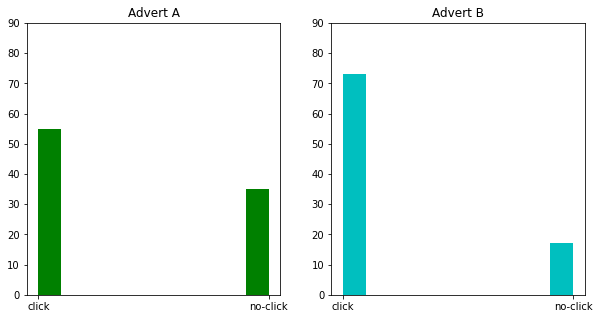

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].hist(df['Advert A'],color='g')
ax[0].set_title('Advert A')
ax[0].set_ylim((0,90))

ax[1].hist(df['Advert B'],color='c')
ax[1].set_title('Advert B')
ax[1].set_ylim((0,90))

plt.show()

`normally as a data scientist the question I have in my mind while using A/B testing that
which ad performed better?` 

## Hypothesis Test/ Significance Test

**The purpose is to learn whether random chance might be responsible for an observed effect**

### Test Statisitcs

Metric for difference or effect of interest from test.

### Null Hypothesis ($H_0$)

- The hypothesis that chance is to blame.
- To check whether claim is applicable or not 
- States that there is no significant difference between a set of a variable 
- in simple words everything is same or equal


By why do we need this? So lets say for A/B tseting we have randomly selected people for control and treatment group. After introducing randomness in the experiment it is okay to assume that any similarity in the groups is completely by chance. But to idenitify this similarity between groups we need a baseline assumption that there is a similarity/ equivalency to be measured. This baseline assumption is Null hypothesis(eg. both of the groups have equal mean height.$\mu_1 = \mu_2$). And to clarify that there is no similarity Null Hypothesis has to be rejected with test statisitcs.

### Alternate Hypothesis ($H_1$ / $H_a$)
- to challenge currently accepted state of knowledge
- more precisely states that there is a significant difference between a set of a variable
- counterpoint to the null hypothesis.


`Null Hypothesis and Alternate Hypothesis are mutually exclusive`

###  Steps for Hypothesis Testing  
- Define Hypothesis H0,Ha
- Select test statistics whose probability distribution function can be found under the Null Hypothesis
- Collect data 
- Compute test statistics and calculate p-value under null hypothesis
- Reject Null Hyppthsis if p-value is lower then predetermined significance value

## Types of tests

| Type of test | Description |
|-|-|
| One tailed/ One way | Region of rejection is only on one side of sampling distribution |
| Two tailed/ Two way | Region of rejection is on both sides of sampling distribution |

## Resampling

Repeatedly sampling values from the observed data, with a general goal of assessing random variability in a statistic. It is used to improve machine learning models accuracy.

There are two types of resampling processes
1. bootstrap
1. permutation tests

### Permutation Tests

**permute** => to change the order of a set of values.

The first step in a permutation test of the hypothesis is to combine the results from groups A and B. 
This is an idea of the null hypthosis that the treatments to which the groups were exposed do not differ. Then we draw up resample groups from the combined set and do the tests, and then see how much they differ.

> Permutation test include without replacement resampling

#### Process
1. Combine the results from the different groups
1. Shuffle, then random draw without replacement resample of the same size a group A.
1. From remaining data, randomly draw without replacement resample of the same size a group B.
1. Do the same for rest if the groups involved in initial combination.
1. Calculate the same statistic calculated for original sample, calculate it for new samples, record it. here we have completed one permutation iteration.
1. Repeat above steps R times, to yield a permutation distribution.


- Now we have 2 types of entities
    - observed difference
    - permutation differences


- 2 scenarios
    - observed differences are within the set of permutation differences. then conclusion is observed difference is within the range what chance(permutation) would produce.
    - observed differences are outside most of the permutation differences then we conclude that random chance is not possible and difference is statistically significant.
    
This **statistically significant** term comes around very often, so what does it represents as mean of these words are very simple to interpret.

In [6]:
np.random.seed(0)

A_size = 15
B_size = 21
total_size = A_size + B_size
A = np.random.randint(low=10, high=300, size=(A_size,))
B = np.random.randint(low=15, high=300, size=(B_size,))

A, B

(array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
        203,  49]),
 array([102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114, 192, 258,
        162, 162, 280, 200, 142,  47,  46, 217]))

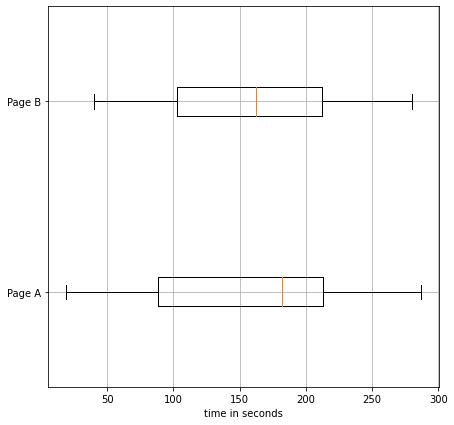

In [7]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.boxplot(
    x=[A,B], 
    vert=False, 
    labels=['Page A','Page B']
)
ax.set_xlabel("time in seconds")
ax.grid()
plt.show()

In [8]:
B.mean() - A.mean()

5.952380952380963

In [9]:
combines = np.hstack((A,B))
combines

array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
       203,  49, 102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114,
       192, 258, 162, 162, 280, 200, 142,  47,  46, 217])

In [10]:
statistics = []
R = 1000
for i in range(R):
    A_resample = np.random.choice(combines,size=A_size,replace=False)
    B_resample = np.array([i for i in combines if i not in A_resample])

    statistics.append(B_resample.mean() - A_resample.mean())

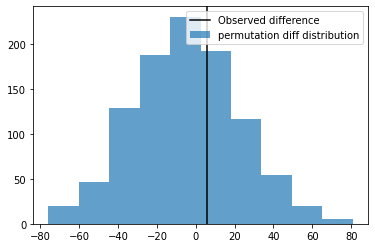

In [11]:
fig, ax = plt.subplots(1,1)
ax.axvline(B.mean() - A.mean(), color='k', label='Observed difference')
ax.hist(statistics,alpha=0.7, label='permutation diff distribution')

ax.legend()
plt.show()

So the Observed Difference is within the range of chance variations, thus is **`not statistically significant`**.

### Bootstrap

Resampling with relacement.

#### Process
1. Combine the results from the different groups
1. Shuffle, then random draw with replacement resample of the same size a group A.
1. From remaining data, randomly draw with replacement resample of the same size a group B.
1. Do the same for rest if the groups involved in initial combination.
1. Calculate the same statistic calculated for original sample, calculate it for new samples, record it. here we have completed one permutation iteration.
1. Repeat above steps R times, to yield a permutation distribution.


In [12]:
np.random.seed(0)

A_size = 15
B_size = 21
total_size = A_size + B_size
A = np.random.randint(low=10, high=300, size=(A_size,))
B = np.random.randint(low=15, high=300, size=(B_size,))

A, B

(array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
        203,  49]),
 array([102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114, 192, 258,
        162, 162, 280, 200, 142,  47,  46, 217]))

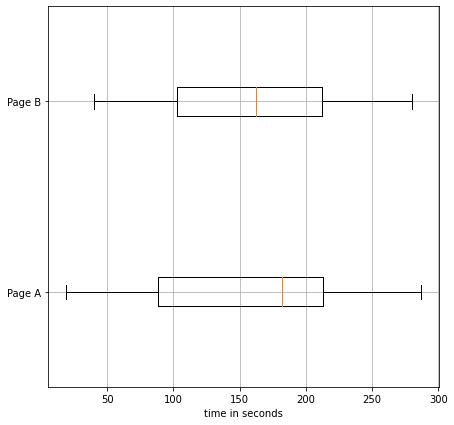

In [13]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.boxplot(
    x=[A,B], 
    vert=False, 
    labels=['Page A','Page B']
)
ax.set_xlabel("time in seconds")
ax.grid()
plt.show()

In [14]:
B.mean() - A.mean()

5.952380952380963

In [15]:
combines = np.hstack((A,B))
combines

array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
       203,  49, 102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114,
       192, 258, 162, 162, 280, 200, 142,  47,  46, 217])

In [16]:
statistics = []
R = 1000
for i in range(R):
    A_resample = np.random.choice(combines,size=A_size,replace=True)
    B_resample = np.random.choice(combines,size=B_size,replace=True)

    statistics.append(B_resample.mean() - A_resample.mean())

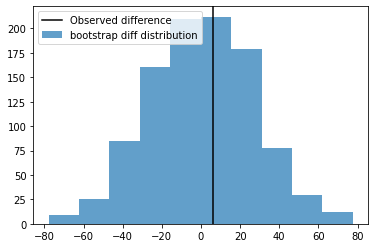

In [17]:
fig, ax = plt.subplots(1,1)
ax.axvline(B.mean() - A.mean(), color='k', label='Observed difference')
ax.hist(statistics,alpha=0.7, label='bootstrap diff distribution')

ax.legend()
plt.show()

So the Observed Difference is within the range of chance variations, thus is **`not statistically significant`**.

## Statisitcal Significance

This is the point where we'll understanding this topic.
Statisitians needs to measure results of an experiment, for that it is required to check whether results of the experiments are more extreme than a random chance might provide. If the result is outside the limits of chance variation then it is said to be `statisitcally significant`

### P Value

- simply observational results are not very precise for statisitcal significance.
- `It can be understood with the frequency in which the chance model is produces result more extreme than the observed result.`
- measure of statisitcal significance for that `null hypothesis` is true.
- we are talking about a chance model that includes a null hypothesis, the p-value is probability of getting the results within limits or extreme (what are these limits, we'll see them in next topic).


In this case we can calculate p-value from the permutation test we had earlier using permutation distribution differences and observed difference.
and get the mean of number of times when the permutation (chance possibility) differences are greater than or equal to observed difference.

In [18]:
np.random.seed(0)

A_size = 15
B_size = 21
total_size = A_size + B_size
A = np.random.randint(low=10, high=300, size=(A_size,))
B = np.random.randint(low=10, high=300, size=(B_size,))

combines = np.hstack((A,B))

statistics = []
R = 1000
for i in range(R):
    A_resample = np.random.choice(combines,size=A_size,replace=True)
    B_resample = np.random.choice(combines,size=B_size,replace=True)

    statistics.append(B_resample.mean() - A_resample.mean())
    
obs_diffs = B.mean() - A.mean()
perm_diffs = np.array(statistics)


print("p-value", np.mean(perm_diffs >= obs_diffs))

p-value 0.257


so the result here is 0.257 or 25.7% times we'll achieve the same results with chance variation.

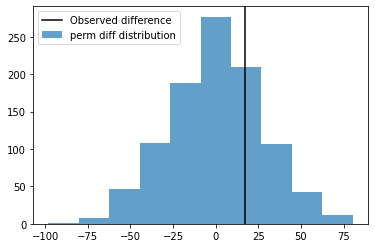

In [19]:
fig, ax = plt.subplots(1,1)
ax.axvline(obs_diffs, color='k', label='Observed difference')
ax.hist(perm_diffs,alpha=0.7, label='perm diff distribution')

ax.legend()
plt.show()

### alpha

But what is the parameter for `unusualness`. How do we decide that we have a thershold/ limit for unusualness.

This thershold is specified earlier, like in case of null hypothesis case more extreme than 5%. and this threshold is called `alpha`.

Typically alpha values(significance level) are 5% or 1%.

probability threshold of 'unusualness' that chance results must cross to be statistically significant.


> A good question here is given a chance model, what is the probability that results are extreme ?




| p-val vs alpha | interpretation |
|-|-|
| Less than 0.01 | strong evidence against Null Hypothesis, very statistically significant |
| 0.01 to 0.05 | Some evidence against Null Hypothesis, statistically significant | 
| Greater than 0.05 | Insufficient evidence against Null Hypothesis | 


Below example is something I cooked up for this understanding. This may change later.

/home/nishant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


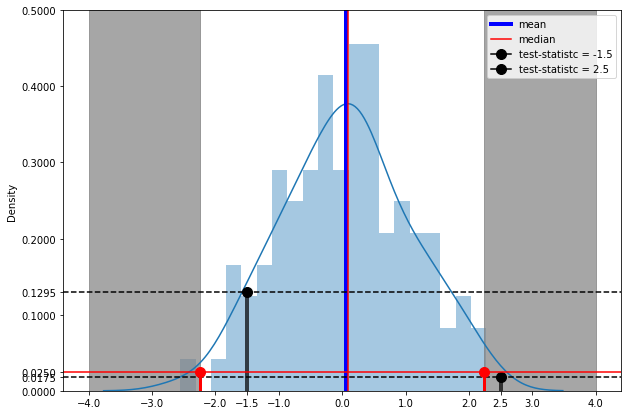

In [20]:
from scipy import stats
np.random.seed(0)

mu, sigma, n_records  = 0, 1, 100 
test_results = [-1.5,2.5]

alpha = 0.05 # 5%
data = np.random.normal(loc=mu,scale=sigma,size=n_records)
mean, median, std_dev  = np.mean(data), np.median(data), np.std(data)

#######################################################
# left_bound -- left_side -- right_side -- right_bound
left_bound = -4
left_side = stats.norm.ppf(q=alpha/4)

right_side = -stats.norm.ppf(q=alpha/4)
right_bound = 4

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
sns.distplot(data,bins=20,norm_hist=True)

ax.axvline(mean,label="mean",c='b',lw=4)
ax.axvline(median,label="median",c="r")

for od in test_results:    
    pdf_score = stats.norm.pdf(od)
    ax.vlines(od,ymin=0,ymax=pdf_score,color='k',lw=4,alpha=0.7)
    ax.axhline(pdf_score,color='k',ls='--')
    ax.plot(od,pdf_score,'k',marker='o',ms=10,label=f"test-statistc = {od}")
    x_ticks = np.append(ax.get_xticks(), od)
    y_ticks = np.append(ax.get_yticks(), pdf_score)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)


ax.axvspan(left_bound, left_side, alpha=0.7, color='grey')
ax.axvspan(right_side, right_bound, alpha=0.7, color='grey')

ax.plot(left_side,alpha/2,'r',marker='o',ms=10)
ax.vlines(left_side,0,alpha/2,color='r',lw=3)


ax.plot(right_side,alpha/2,'r',marker='o',ms=10)
ax.vlines(right_side,0,alpha/2,color='r',lw=3)


ax.axhline(alpha/2,c='r')
y_ticks = np.append(ax.get_yticks(), alpha/2)
ax.set_yticks(y_ticks)

ax.legend()
plt.show()

| test-statistics | p-value |
|-|-|
| -1.5 | 0.1295 |
| 2.5 | 0.0175 |

- Grey part is showing combined 5% of the data
- blue part is showing rest 95% of the data
- like test-statisitc -1.5 is in the most population, p-value greater than significance level alpha (p > 0.05)(accept null hypothesis)
- and test-statistics 2.5 is in the grey area , p-value less then significance value (p_value < 0.05). making result statisitcally significant against chance variation(reject null hypothesis)

### Decision Errors 

| Type 1 error | Type 2 error |
| -------------------------------------------------------------------- | ------------------------------------------------ |
| Mistakenly concluding an affect is real(when it is due to chance) | Mistakenly concluding an affect is due to chance(when it is real) |
| Occurs when a researcher rejects the Null Hypothesis when it is true | Fails to reject the hypothesis when it is false |
| False Positive | False Negative |
| Significance Level : probability of commiting a Type 1 error | Power Of Test : probability of not commiting a Type 2 error |

----------------

## Statistical Tests 

## t-Tests

> t-test generally applies when test statistic would follow a normal distribution. 

`t-statisitc` : standardized version of test statistics.

`t-distribution` : reference distribution from which observed t-statistic is compared. more details here [Student's t-distribution](https://machinelearningexploration.readthedocs.io/en/latest/PracticalStatistics/Distributions.html#Student's-t-distribition)

[t-test wiki](https://en.wikipedia.org/wiki/Student%27s_t-test)

1. Normally estimation for mean and variance of sample is made and test statistics is calculated  
1. if population variance is identified, it is reasonable to consider that test statisics is normally distributed
1. if population variance is unknown, sample variance is used and test statistics follows t distribution

`parent population doesn't need to be normally distributed but population of sample means assumed to be normal.`

### One Sample

\begin{align}
    t-statisitic &= \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}\\
    \bar{x} &= \text{sample mean}&\\
    \mu_0 &= \text{population mean}&\\
    s &= \text{sample standard deviation}&\\
    n &= \text{sample size}&\\
    \text{degree of freedom} &= n - 1&\\
\end{align}

In [21]:
from scipy.stats import ttest_1samp,norm,t

In [22]:
print(ttest_1samp.__doc__[:250])

Calculate the T-test for the mean of ONE group of scores.

    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.

    


Null Hypothesis $H_0$ = mean of the random sample is 5.0, $\mu = \mu_0$\
Alternate Hypothesis $H_a$ = mean of the random sample is not 5.0, $\mu \ne \mu_0$

let significance level is 5% and confidence interval is 95%. 

considering it is a two-tailed test then $\alpha$ = 0.025 (2.5 / 100)

In [23]:
alpha = 0.025 

generating data

In [24]:
mu = 5.0 # population average
sigma = 10 #scale parameter -> std dev -> root(var)
n = 100 #number of observations
rng = np.random.default_rng() #random number generator

In [25]:
rvs = norm.rvs(loc=mu, scale=sigma, size=(n,), random_state=0)

assuming that the population is normally distributed and we have a variance.

now lets perform test

In [26]:
test_statistic, pvalue = ttest_1samp(rvs,popmean=5.0)

In [27]:
test_statistic

0.5904283402851683

In [28]:
pvalue

0.5562489158694683

now if pvalue is greater than $alpha$, then it is still in confidence level, which means our observation is usual and there is no statistical significance. Null hypothesis is accepted.

else the obsevation is not usual, hence statistical significant result ann Null Hypothesis is rejected.

In [29]:
pvalue > alpha

True

`Null hypothesis is accepted.`

### Two Samples Unpaired

`This is as straight forward explanation as it can be.`

The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.

from this doc - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [30]:
from scipy.stats import ttest_ind

#### Equal sample sizes and variance
\begin{align}
    t-statisitic &= \frac{\bar{X_1} - \bar{X_2}}{S_p\sqrt{\frac{2}{n}}}\\
    \text{where } S_p &= \sqrt{\frac{S_{X_1}^2 + S_{X_2}^2}{2}}\\
    \bar{X_1} &= \text{sample 1 mean}&\\
    \bar{X_2} &= \text{sample 2 mean}&\\
    S_{X_1} &= \text{sample 1 standard deviation}&\\
    S_{X_2} &= \text{sample 2 standard deviation}&\\
    n &= \text{sample size}&\\
    \text{degree of freedom} &= n - 1&\\
\end{align}

In [99]:
rvs1 = norm.rvs(loc=5, scale=10, size=500, random_state=0)
rvs2 = norm.rvs(loc=5, scale=10, size=500, random_state=10)

test_statistic, pvalue = ttest_ind(rvs1, rvs2,equal_var=True)

In [100]:
np.corrcoef(rvs1, rvs2)

array([[1.       , 0.0190992],
       [0.0190992, 1.       ]])

In [32]:
test_statistic

-0.9157617644799356

In [33]:
pvalue

0.3600130785859019

#### Equal or unequal sample sizes, similar variances
\begin{align}
    t-statisitic &= \frac{\bar{X_1} - \bar{X_2}}{S_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}\\
    \text{where Pooled variance } S_p &= \sqrt{\frac{(n_1 - 1)S_{X_1}^2 + (n_2 - 1)S_{X_2}^2}{n_1 + n_2 - 2}}\\
    \bar{X_1} &= \text{sample 1 mean}&\\
    \bar{X_2} &= \text{sample 2 mean}&\\
    S_{X_1} &= \text{sample 1 standard deviation}&\\
    S_{X_2} &= \text{sample 2 standard deviation}&\\
    n_1 &= \text{sample 1 size}&\\
    n_2 &= \text{sample 2 size}&\\
\end{align}

equal size data

In [44]:
rvs1 = norm.rvs(loc=5, scale=10, size=500, random_state=0)
rvs2 = norm.rvs(loc=5, scale=10, size=500, random_state=10)

Now lets create an unequal size data 

In [48]:
rvs3 = norm.rvs(loc=5, scale=10, size=100, random_state=10)

test for equal size data

In [49]:
ttest_ind(rvs1, rvs2, equal_var=True)

Ttest_indResult(statistic=-0.9615234228970171, pvalue=0.33667767624405587)

test for `unequal` size data

In [52]:
ttest_ind(rvs1, rvs3, equal_var=True) 
#without trimming the results are not 100% correct, as data1 and data2 are not same size.

Ttest_indResult(statistic=-0.9615234228970171, pvalue=0.33667767624405587)

https://en.wikipedia.org/wiki/Welch%27s_t-test

https://www.real-statistics.com/students-t-distribution/problems-data-t-tests/yuen-welchs-test/

In [54]:
ttest_ind(rvs1, rvs3, trim=0.2)

Ttest_indResult(statistic=-0.9948307819225728, pvalue=0.32049049729267687)

#### Equal or unequal sample sizes, unequal variances

\begin{align}
    t-statisitic &= \frac{\bar{X_1} - \bar{X_2}}{S_{\bar{\Delta}}}\\
    \text{where } S_{\bar{\Delta}} &= \sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}\\
    \bar{X_1} &= \text{sample 1 mean}&\\
    \bar{X_2} &= \text{sample 2 mean}&\\
    S_1 &= \text{sample 1 standard deviation}&\\
    S_2 &= \text{sample 2 standard deviation}&\\
    n_1 &= \text{sample 1 size}&\\
    n_2 &= \text{sample 2 size}&\\
\end{align}

https://en.wikipedia.org/wiki/Welch%27s_t-test

In [55]:
rvs1 = norm.rvs(loc=5, scale=10, size=500, random_state=0)
rvs2 = norm.rvs(loc=5, scale=20, size=500, random_state=10)

In [56]:
rvs3 = norm.rvs(loc=5, scale=20, size=100, random_state=10)

What if we use the same config of the function

In [57]:
ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=-0.9127612874020155, pvalue=0.3616586927805526)

Now with proper configs

In [58]:
ttest_ind(rvs1, rvs2, equal_var=True)

Ttest_indResult(statistic=-0.9127612874020156, pvalue=0.3615885407125987)

So if we dont mention that variances are different then this function underestimates pvalue.

Now with `unequal` sized data

In [59]:
ttest_ind(rvs1, rvs3, equal_var=True, trim=0.2)

Ttest_indResult(statistic=-1.4564816906088165, pvalue=0.14613596903375511)

#### Working Example

In [60]:
from sklearn.datasets import load_iris

In [62]:
dataset = load_iris()

df = pd.DataFrame(dataset.get('data'),columns=dataset.get('feature_names'))
df['target'] = dataset.get('target')

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [87]:
X1 = df[df['target'] == 0]['sepal length (cm)'].values #flower 1
X2 = df[df['target'] == 1]['sepal length (cm)'].values #flower 2

In [91]:
X1.mean(),np.var(X1)

(5.006, 0.12176400000000002)

In [92]:
X2.mean(),np.var(X2)

(5.936, 0.261104)

Variances are different

Are they independent ?


In [93]:
np.corrcoef(X1, X2)

array([[ 1.        , -0.08084973],
       [-0.08084973,  1.        ]])

Pearson Correlation Coeff is very low. We can run an independent test.

In [94]:
test_statistic, pvalue = ttest_ind(X1, X2, equal_var=False)
test_statistic, pvalue

(-10.52098626754911, 3.746742613983842e-17)

In [95]:
pvalue > 0.05

False

Statistically Significant Result

### Two Samples Paired

https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples

In [96]:
from scipy.stats import ttest_rel

In [97]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=0)
rvs2 = (stats.norm.rvs(loc=5, scale=10, size=500, random_state=0)+ stats.norm.rvs(scale=0.2, size=500, random_state=10))

In [98]:
np.corrcoef(rvs1,rvs2)

array([[1.        , 0.99982077],
       [0.99982077, 1.        ]])

Correlation Coeffecient is too high (Close to 1)

In [ ]:
ttest_rel(rvs1,rvs2)

Ttest_relResult(statistic=-0.9246210365702174, pvalue=0.3556099757586745)

## Multiple Tests

Multiple tests notion extends on the thought `If you torture the data long enough, it will confess.`

**Type 1 error** - Mistakenly concluding that result is statistically significant. 

**False discovery rate** - In multiple tests, rate of making Type 1 error.

**Overfitting** - fitting the noise.

Explanation from the book -

lets say that we have 20 predictor variables and 1 target. 
So if we try to perform hypothesis test on these variables then there is good chance that one predictor will turn out to be `(falsely)` statistically significant. And it is called Type 1 error. 

alpha significance level is 0.05. So, the probability that one will test correctly statistically significant is 0.95. 
then all 20 will test correctly statistically significant is 0.95 x 0.95 x ... x 0.95^20

In [1]:
0.95**20

0.3584859224085419

Then the probability that at least one predictor will test falsely statistically significant is 

1 - (prob all will be significant correctly)

In [2]:
1 - 0.95**20

0.6415140775914581

64%.. thats something.

## Chi-squared($\chi^2$) test (pearson's)

A measure of the extent to which some observed data is different from expected value.

Working with categorical distribution and comparison between `Observed data` and `Calculated data`.


Goodness of fit test & test for independence

In [1]:
import numpy as np
import pandas as pd


**Null Hypothesis** : There is no relation between the marital status and educational qualification.

**Alternate Hypothesis** : There is a significance relation between marital 
status and educational qualification.

**significance level** ($\alpha$) = 0.05 (95%)

**Observed Values**

In [2]:
obs_data = np.array([
    [18, 36, 21, 9, 6],
    [12, 36, 45, 36, 21],
    [6, 9, 9, 3, 3],
    [3, 9, 9, 6, 3]
])
obs_df = pd.DataFrame(obs_data,columns=['middle school','high school','bachelors','masters','phd'])
obs_df.index = ['never married','married','divorced','widowed']
obs_df

,middle school,high school,bachelors,masters,phd
never married,18,36,21,9,6
married,12,36,45,36,21
divorced,6,9,9,3,3
widowed,3,9,9,6,3


In [3]:
cont_table = obs_df.copy()

In [4]:
cont_table['columns_total'] = cont_table.values.sum(axis=1)
cont_table

,middle school,high school,bachelors,masters,phd,columns_total
never married,18,36,21,9,6,90
married,12,36,45,36,21,150
divorced,6,9,9,3,3,30
widowed,3,9,9,6,3,30


In [5]:
rows_total = pd.DataFrame(cont_table.values.sum(axis=0).reshape(1,-1), columns=cont_table.columns)
rows_total.index = ['rows_total']

rows_total

,middle school,high school,bachelors,masters,phd,columns_total
rows_total,39,90,84,54,33,300


In [6]:
cont_table = cont_table.append(rows_total)
cont_table

,middle school,high school,bachelors,masters,phd,columns_total
never married,18,36,21,9,6,90
married,12,36,45,36,21,150
divorced,6,9,9,3,3,30
widowed,3,9,9,6,3,30
rows_total,39,90,84,54,33,300


What I did here ? I calculated rows total and columns total.

Expected Value Calculation - 

1. never married - middle school

    $\frac{90 \times 39}{300} = 11.7$
    
1. married - high school
    
    $\frac{90 \times 90}{300} = 27$

In [7]:
x = cont_table.values
x

array([[ 18,  36,  21,   9,   6,  90],
       [ 12,  36,  45,  36,  21, 150],
       [  6,   9,   9,   3,   3,  30],
       [  3,   9,   9,   6,   3,  30],
       [ 39,  90,  84,  54,  33, 300]])

multiplying rows total and columns total and dividing by complete total.

In [8]:
exp_values = (x[:-1,[-1]] @ x[[-1],:-1]) / x[-1,-1]
exp_values

array([[11.7, 27. , 25.2, 16.2,  9.9],
       [19.5, 45. , 42. , 27. , 16.5],
       [ 3.9,  9. ,  8.4,  5.4,  3.3],
       [ 3.9,  9. ,  8.4,  5.4,  3.3]])

In [9]:
exp_df = pd.DataFrame(
    exp_values,
    columns=['middle school','high school','bachelors','masters','phd']
)
exp_df.index = obs_df.index
exp_df

,middle school,high school,bachelors,masters,phd
never married,11.7,27.0,25.2,16.2,9.9
married,19.5,45.0,42.0,27.0,16.5
divorced,3.9,9.0,8.4,5.4,3.3
widowed,3.9,9.0,8.4,5.4,3.3


In [10]:
obs_df

,middle school,high school,bachelors,masters,phd
never married,18,36,21,9,6
married,12,36,45,36,21
divorced,6,9,9,3,3
widowed,3,9,9,6,3


$\text{pearson residual } R = \frac{observed - expected}{\sqrt{expected}} $

$\chi^2 = \sum_{i=0}^{r \times c} \frac{(observed - expected)^2} {expected}$

In [13]:
result = np.square(obs_df - exp_df) / exp_df

result

,middle school,high school,bachelors,masters,phd
never married,3.392308,3.0,0.700000,3.200000,1.536364
married,2.884615,1.8,0.214286,3.000000,1.227273
divorced,1.130769,0.0,0.042857,1.066667,0.027273
widowed,0.207692,0.0,0.042857,0.066667,0.027273


In [18]:
chi2 = result.values.sum()
chi2

23.56689976689977

### Degrees of freedom 

$dof = (r- 1) \times (c - 1)$

In [19]:
r,c = obs_data.shape

dof = (r-1) * (c-1)
dof

12

### Chi-2 table

<iframe src='https://people.richland.edu/james/lecture/m170/tbl-chi.html' width='100%'></iframe>

In [20]:
alpha = 0.05

chi2_tab = 21.026

In [21]:
chi2 > chi2_tab

True

### Scipy chi2 contingency

In [23]:
from scipy.stats import chi2_contingency

In [28]:
chi2_cal, p_value, dof, exp_table = chi2_contingency(observed=obs_data)

In [29]:
chi2_cal, p_value, dof

(23.56689976689977, 0.023281019557072378, 12)

In [30]:
pd.DataFrame(exp_table, columns=obs_df.columns)

,middle school,high school,bachelors,masters,phd
0,11.7,27.0,25.2,16.2,9.9
1,19.5,45.0,42.0,27.0,16.5
2,3.9,9.0,8.4,5.4,3.3
3,3.9,9.0,8.4,5.4,3.3


In [34]:
alpha, p_value, alpha > p_value

(0.05, 0.023281019557072378, True)

## ANOVA

If we have multiple groups with numeric data, statistical procedure that tests for statistically significant difference amoung the groups is called `analysis of variance` or ANOVA.


Pairwise comparison - hyp test(like of means) between two groups amoung multiple groups.

Omnibus test - take all the groups and perform a single hyp test for overall variance among multiple group means.

Sum of Squares (SS) - Deviations from some average value
- Difference among the groups, called the treatment effect(TR)
- Difference within the groups, called error (E)

Total SS (SSTO) = SSTR + SSE

Mean Squares (MS) = $\frac{SS}{degree of freedom}$


- Assumptions 
    - sample is randomly selected from populations and randomly assigned to each of the treatment groups, each observation is thus independent of any other observation - randomness and independence.
    
    - Population is considered normally distribution.
    

F-Statistic = $\frac{MSTR}{MSE} \sim F_{c-1, n-c}$

c = number of groups

### One-Way ANOVA

| Source of Variation | d.f. | SS | MS | F | P-value | F-crit |
|-|-|-|-|-|-|-|
| Between Groups | c-1 | SSTR | MSTR | F= MSTR/MSE | p | $F_\alpha$ |
| Within Groups | n-c | SSE | MSE ||||
| Total | n-1 | SSTO |||||

TODO

### Two-Way ANOVA

TODO